# Day 08. Exercise 05
# Clustering

## 0. Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

plt.style.use('seaborn-v0_8')

## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [2]:
df = pd.read_csv('../data/regression.csv')


In [3]:
X = df[['num_commits', 'AVG(diff)']]

print(f"Data Shape: {X.shape}")
X.head()

Data Shape: (29, 2)


,num_commits,AVG(diff)
0,62,-64.400000
1,20,-74.800000
2,61,-159.000000
3,51,-61.600000
4,5,-5.666667


## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [4]:
kmeans = KMeans(n_clusters=3, random_state=21, n_init=10)

In [5]:
labels = kmeans.fit_predict(X)

In [6]:
score = silhouette_score(X, labels)
print(f"KMeans (3 clusters) Silhouette Score: {score:.2f}")

KMeans (3 clusters) Silhouette Score: 0.44


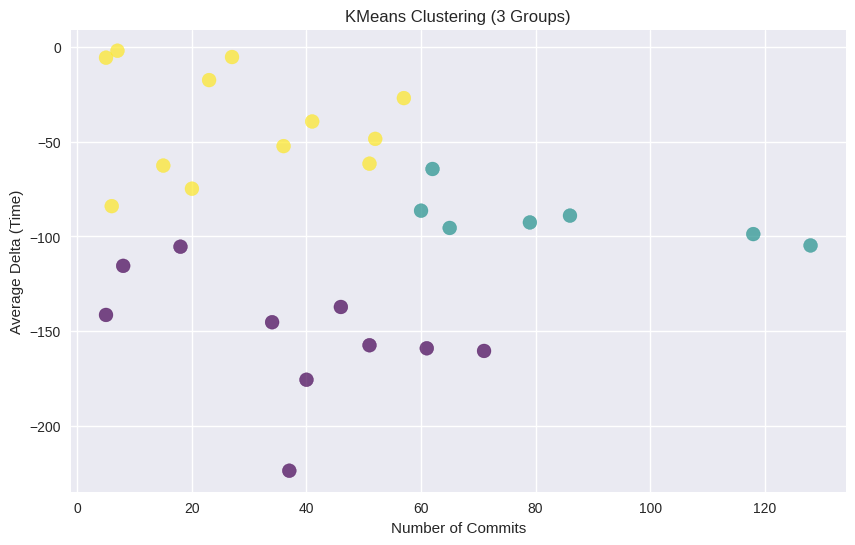

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(X['num_commits'], X['AVG(diff)'], c=labels, cmap='viridis', s=100, alpha=0.7)
plt.title('KMeans Clustering (3 Groups)')
plt.xlabel('Number of Commits')
plt.ylabel('Average Delta (Time)')
plt.show()

## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [8]:
dbscan = DBSCAN(eps=20, min_samples=2)

In [9]:
labels_db = dbscan.fit_predict(X)

In [10]:
try:
    score_db = silhouette_score(X, labels_db)
    print(f"DBSCAN Silhouette Score: {score_db:.2f}")
except ValueError:
    print("DBSCAN Error: Not enough clusters found to calculate score.")

DBSCAN Silhouette Score: 0.38


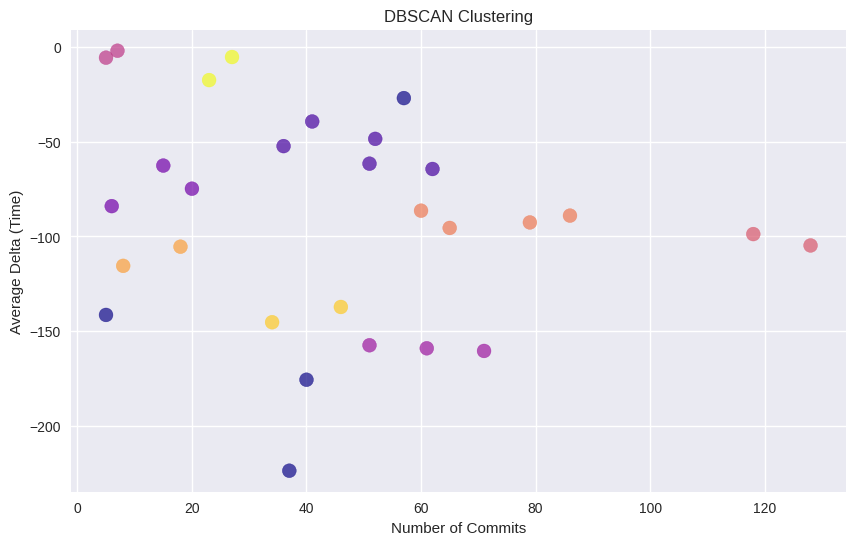

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(X['num_commits'], X['AVG(diff)'], c=labels_db, cmap='plasma', s=100, alpha=0.7)
plt.title('DBSCAN Clustering')
plt.xlabel('Number of Commits')
plt.ylabel('Average Delta (Time)')
plt.show()

## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

In [13]:
agg = AgglomerativeClustering(n_clusters=5)
labels_agg = agg.fit_predict(X)


In [14]:
score_agg = silhouette_score(X, labels_agg)
print(f"Hierarchical Silhouette Score: {score_agg:.2f}")

Hierarchical Silhouette Score: 0.46


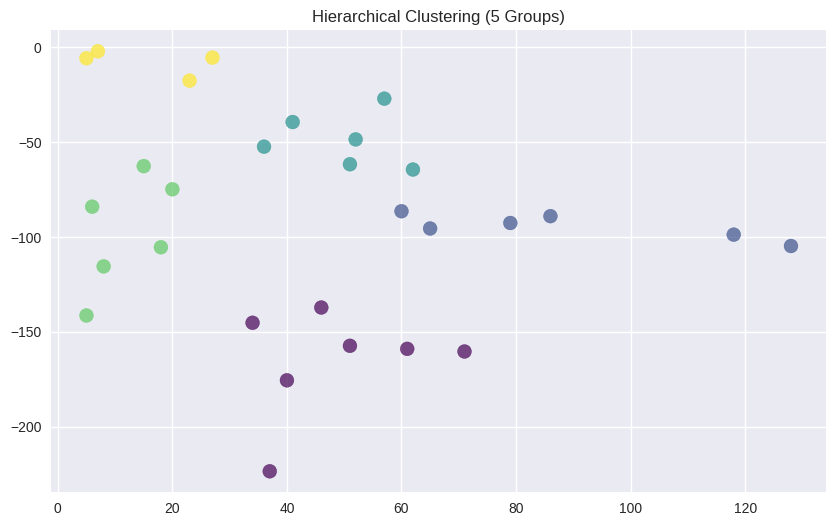

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(X['num_commits'], X['AVG(diff)'], c=labels_agg, cmap='viridis', s=100, alpha=0.7)
plt.title('Hierarchical Clustering (5 Groups)')
plt.show()

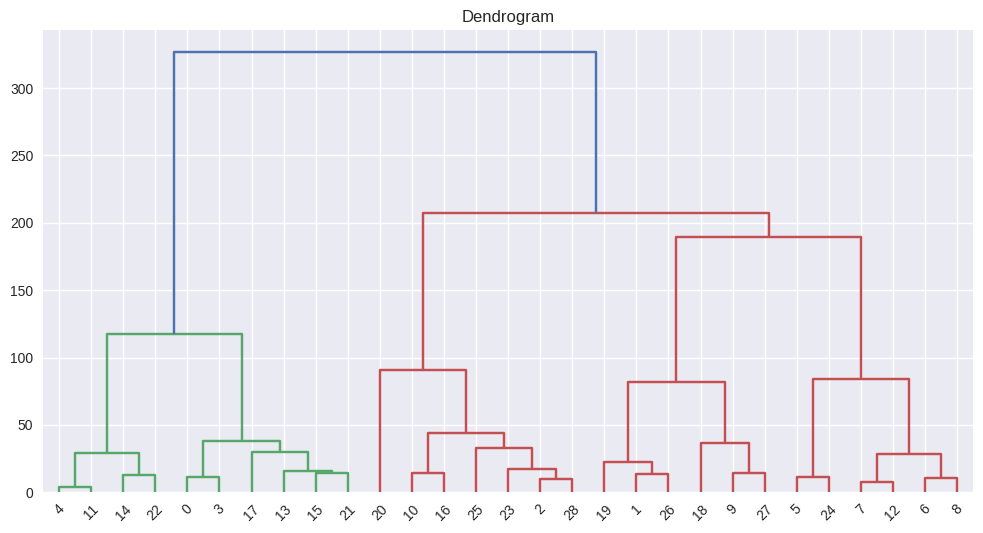

In [16]:
plt.figure(figsize=(12, 6))
plt.title("Dendrogram")
dendro = linkage(X, method='ward')
dendrogram(dendro)
plt.show()

## 5. Function

Write a function that:
1. Takes as arguments: model class of clustering, its parameters, the name of the parameter for optimization, the range of the parameter values to try.
2. Tries different values from the given parameter range and calculates the `silhouette_score` for each value from the range.
3. Finds out the best value for the parameter in the range.
4. Returns two subplots:


- - the first shows how the `silhouette_score` changes depending on the value of the parameter,
- - the second visualizes the data on a `scatter plot` using the clustering model with the best value of the parameter.

In [17]:
def optimize_clustering(model_class, X, param_name, param_range):
    scores = []
    best_score = -1
    best_param = None
    best_labels = None
    
    print(f"Optimizing {model_class.__name__}...")
    
    for value in param_range:
        params = {param_name: value}
        
        if 'KMeans' in str(model_class):
             params['random_state'] = 21
             params['n_init'] = 10
             
        model = model_class(**params)
        
        labels = model.fit_predict(X)
        
        unique_labels = np.unique(labels)
        if len(unique_labels) > 1:
            score = silhouette_score(X, labels)
        else:
            score = -1 
            
        scores.append(score)
        
        if score > best_score:
            best_score = score
            best_param = value
            best_labels = labels
            
    print(f"Best {param_name}: {best_param} with Score: {best_score:.2f}")
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    axes[0].plot(param_range, scores, marker='o')
    axes[0].set_title(f'Silhouette Score vs {param_name}')
    axes[0].set_xlabel(param_name)
    axes[0].set_ylabel('Silhouette Score')
    
    axes[1].scatter(X.iloc[:, 0], X.iloc[:, 1], c=best_labels, cmap='viridis', s=100, alpha=0.7)
    axes[1].set_title(f'Best Clustering ({param_name}={best_param})')
    axes[1].set_xlabel(X.columns[0])
    axes[1].set_ylabel(X.columns[1])
    
    plt.tight_layout()
    plt.show()




Optimizing KMeans...
Best n_clusters: 8 with Score: 0.51


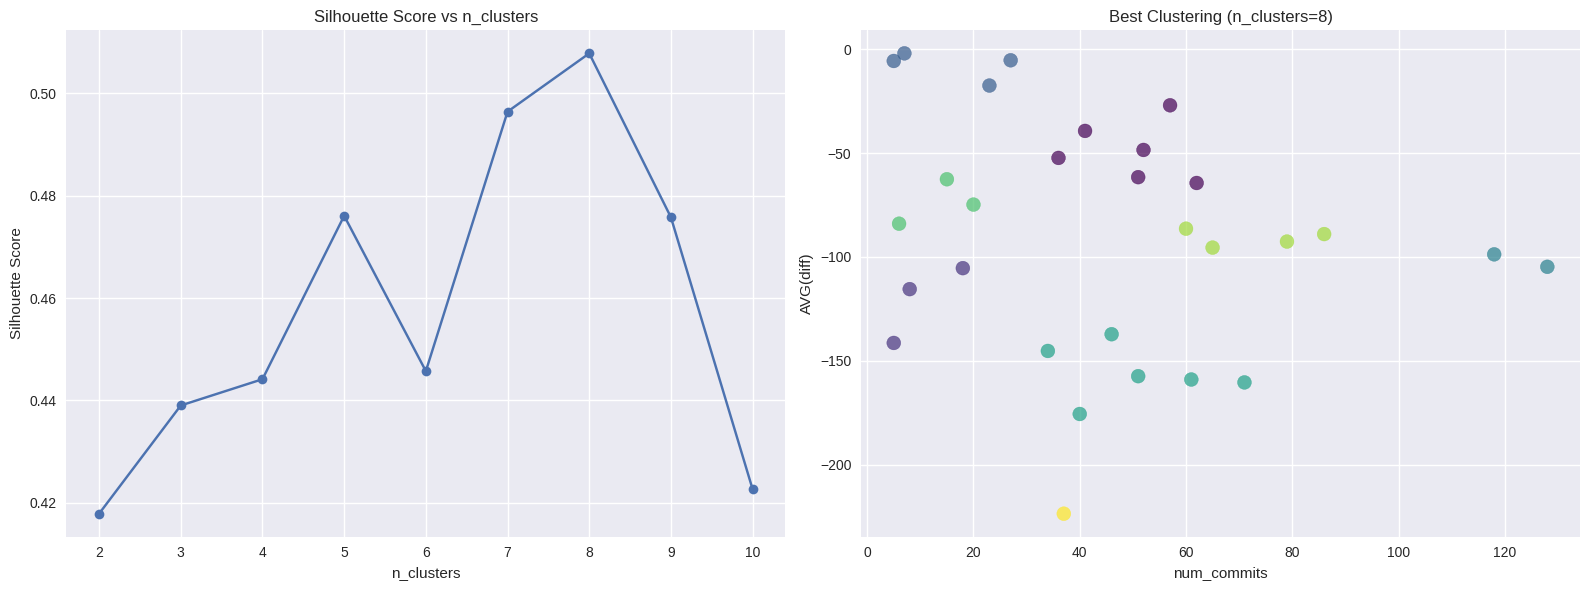

In [18]:
optimize_clustering(KMeans, X, 'n_clusters', range(2, 11))

Optimizing AgglomerativeClustering...
Best n_clusters: 8 with Score: 0.51


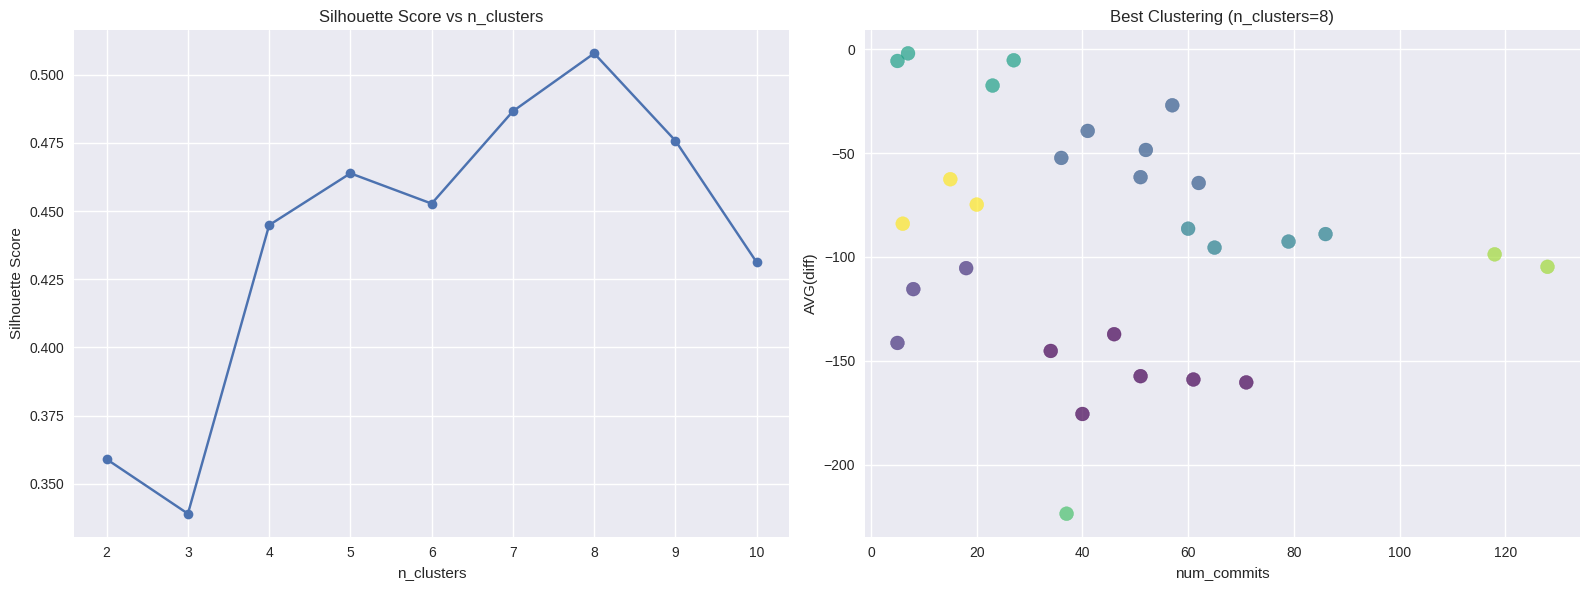

In [19]:
optimize_clustering(AgglomerativeClustering, X, 'n_clusters', range(2, 11))